In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,r2_score



In [3]:
df=pd.read_csv(r'./HousingData.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df = df.dropna()  # Drop rows with missing values
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


MEDV stands for Median value of owner-occupied homes, measured in $1000s.

🏠 What it Represents:
It is the target variable in the Boston Housing Dataset — the value we’re trying to predict using the other features (like number of rooms, crime rate, etc.).

In [5]:
# Separate features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Standardize the features
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

## PCA

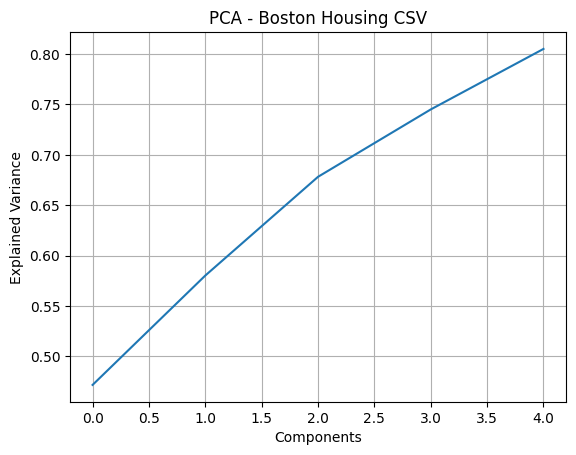

In [6]:
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Boston Housing CSV")
plt.grid()
plt.show()


🧠 How to Interpret This Plot
Let’s go point-by-point:

Number of Components	Approx. Cumulative Explained Variance
1	~47%
2	~59%
3	~68%
4	~81%

This means:

If you use only the first component, you preserve about 47% of the dataset's information.

With the first 2, you preserve ~59%.

With the first 4, you get ~81% of the original information.

## Linear Regression

Mean Squared Error: 39.27397216949696
R^2 Score: 0.534373009265185


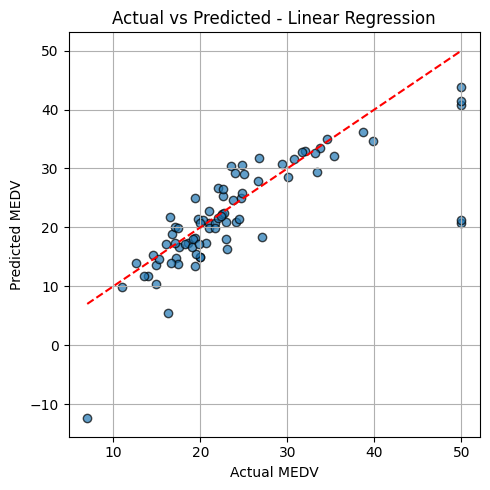

In [17]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# plot 
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()





Sure! You're predicting MEDV, which usually stands for Median value of owner-occupied homes (in $1000s).

In simple terms:

You have some input data about houses (like size, number of rooms, age, location, etc.).

Your model (Linear Regression) learns from the training data how these features relate to the house prices.

Then, you use the model to predict house prices (MEDV) on new data (the test set).

You compare the predicted prices to the actual prices to see how well your model is doing.

The plot shows how close the predicted house prices are to the real prices. If the points fall close to the red dashed line (which means predicted = actual), your model is doing a good job!







## POLYNOMIAL REGRESSION 

MSE:  31.484797830979165


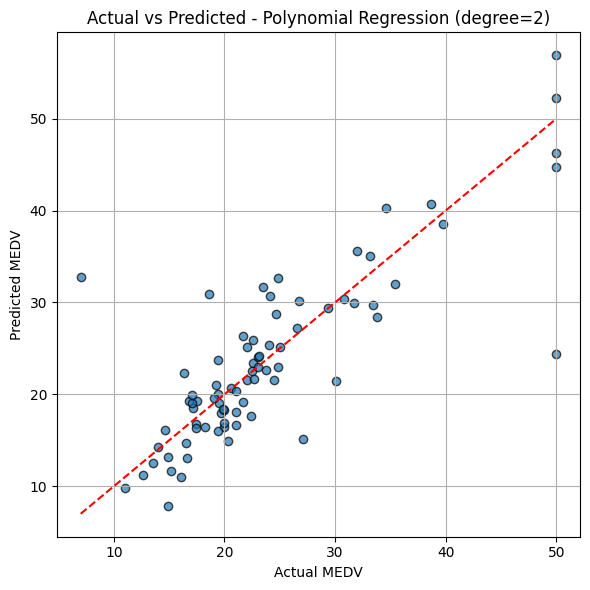

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model.fit(X_train_scaled,y_train)
y_pred_poly=poly_model.predict(X_test_scaled)
print("MSE: ",mean_squared_error(y_test,y_pred_poly))



plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_poly, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Polynomial Regression (degree=2)")
plt.grid(True)
plt.tight_layout()
plt.show()